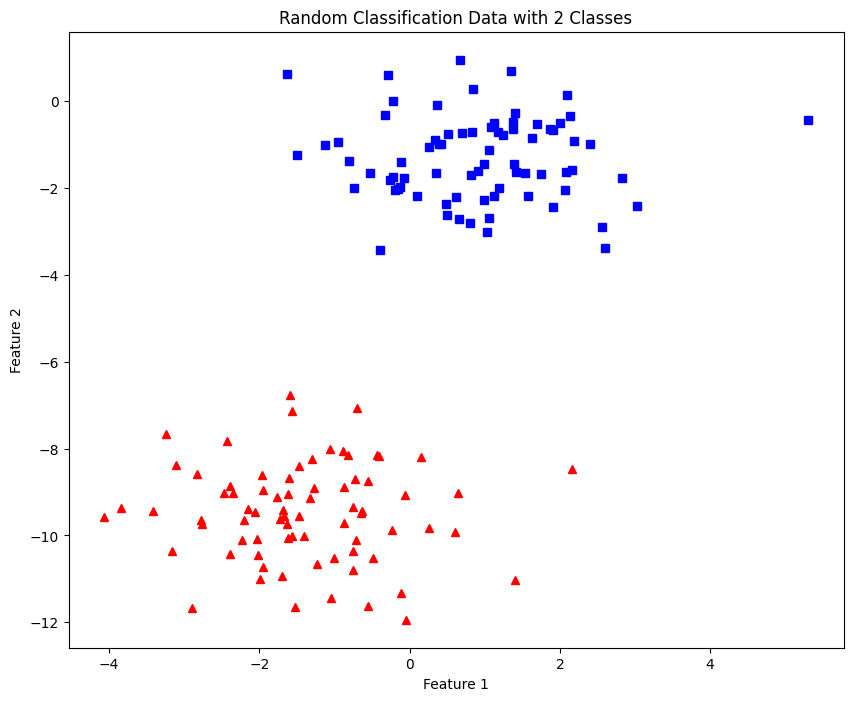

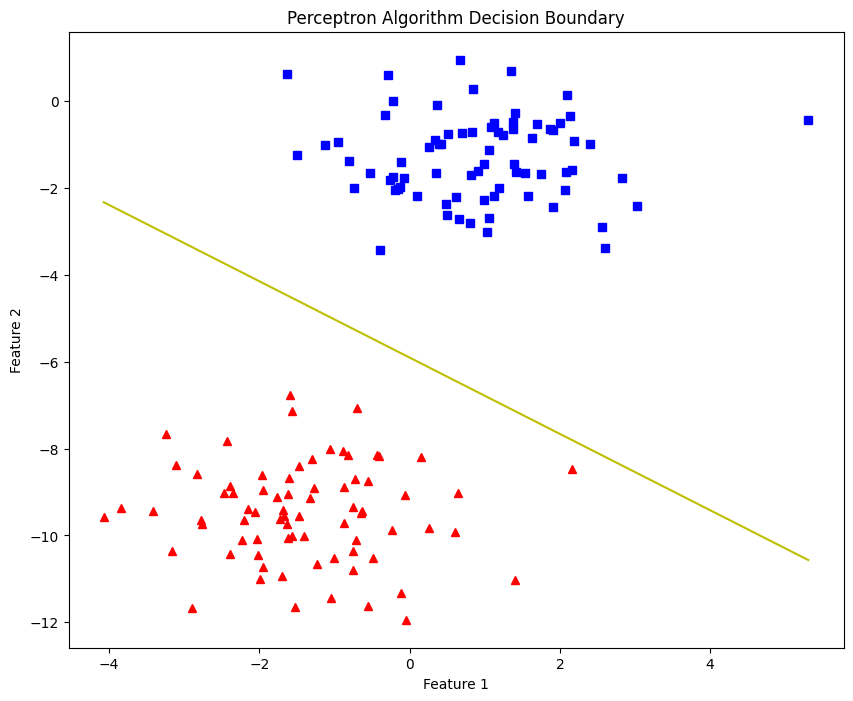

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generating random classification data
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

# Plotting initial data
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Random Classification Data with 2 Classes')

# Step function
def step_func(z):
    return 1.0 if (z > 0) else 0.0

# Perceptron model
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n + 1, 1))  # Initializing parameters with bias
    n_miss_list = []  # To store misclassified examples count each epoch

    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)  # Inserting bias term
            y_hat = step_func(np.dot(x_i.T, theta))    # Prediction

            if (np.squeeze(y_hat) - y[idx]) != 0:      # Update if misclassified
                theta += lr * ((y[idx] - y_hat) * x_i)
                n_miss += 1
        
        n_miss_list.append(n_miss)  # Storing misclassified count per epoch

    return theta, n_miss_list

# Plotting decision boundary
def plot_decision_boundary(X, theta):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]
    x2 = m * np.array(x1) + c

    # Plotting
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r^")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
    plt.plot(x1, x2, 'y-')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Perceptron Algorithm Decision Boundary')

# Running the perceptron and plotting results
theta, miss_l = perceptron(X, y, lr=0.5, epochs=100)
plot_decision_boundary(X, theta)
